In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
# DATA_DIR = Path("/scratch/sshah/2021-05-26/")
DATA_DIR = Path("_data/2021-05-26/")
# DATA_DIR = Path("_data") / "2021-11-08-v2/"
# DATA_DIR = Path("_data") / "2021-11-20"
assert DATA_DIR.exists()

# def _cook(p: Path) -> pd.DataFrame
dfs = []
files = list(DATA_DIR.glob("*test.csv.zip"))
print([f.name for f in files])
for f in files:
    _df = pd.read_csv(f)
    assert _df.tuning.nunique() == 1
    print(_df.tuning.unique()[0])
    if _df.tuning.unique()[0]:
        assert _df.tuning.unique()[0] == 1
        print("breaking")
        continue
    print(_df.init_seed.unique())
#     if _df.init_seed.unique() != [1000]:
#         continue
    print(_df.damper.unique())
    dfs.append(_df)
print(len(dfs))

['17-test.csv.zip', '10-test.csv.zip', '4-test.csv.zip', '3-test.csv.zip', '21-test.csv.zip', '11-test.csv.zip', '16-test.csv.zip', '20-test.csv.zip', '2-test.csv.zip', '5-test.csv.zip', '8-test.csv.zip', '9-test.csv.zip', '18-test.csv.zip', '19-test.csv.zip', '14-test.csv.zip', '13-test.csv.zip', '22-test.csv.zip', '7-test.csv.zip', '0-test.csv.zip', '12-test.csv.zip', '15-test.csv.zip', '1-test.csv.zip', '6-test.csv.zip', '23-test.csv.zip', '24-test.csv.zip']
1
breaking
False
[1000]
['radadamp']
1
breaking
1
breaking
1
breaking
False
[1001]
['geodamp']
False
[1000]
['adagrad']
False
[1001]
['geodamplr']
False
[1002]
['radadamp']
1
breaking
False
[1002]
['geodamp']
False
[1000]
['radadamp']
1
breaking
False
[1001]
['geodamplr']
1
breaking
False
[1000]
['geodamplr']
1
breaking
False
[1001]
['radadamp']
1
breaking
False
[1000]
['geodamplr']
False
[1000]
['radadamp']
False
[1000]
['geodamp']
1
breaking
False
[1001]
['radadamp']
False
[1001]
['radadamp']
15


In [91]:
df = pd.concat(dfs, sort=False)

df.loc[(df.initial_batch_size == df.max_batch_size) & (df.damper == "radadamp"), "damper"] = "radadamplr"


df["epochs_binned"] = np.round(df["epochs"])
df["model_updates_binned"] = np.round(df["model_updates"], decimals=-2)

dampers = {
    "geodamplr": "SGD",
    "geodamp": "GeoDamp",
    "radadamp": "RadaDamp",
    "radadamplr": "RadaDamp-LR",
    "adagrad": "Adagrad",
}

HUE_ORDER = ["SGD", "GeoDamp", "RadaDamp", "RadaDamp-LR", "Adagrad"]

# stroke: LR decay (dashed) or BS increase (solid)
# color: type (SGD/GeoDamp, RadaDamp*, Adagrad)
STYLES = ["C0-.", "C0-", "C1-", "C1-.", "C2-."]
ACC_LIM = (0.865, 0.915)

df["Optimizer"] = df["damper"].apply(dampers.get)
print(df.groupby("damper").init_seed.unique())
# df = df[df.init_seed.isin([1000, 1001])].copy()
df = df[df.init_seed.isin([1000])].copy()
df.groupby("damper").init_seed.unique()

damper
adagrad                   [1000]
geodamp       [1001, 1002, 1000]
geodamplr           [1001, 1000]
radadamp      [1002, 1001, 1000]
radadamplr          [1000, 1001]
Name: init_seed, dtype: object


damper
adagrad       [1000]
geodamp       [1000]
geodamplr     [1000]
radadamp      [1000]
radadamplr    [1000]
Name: init_seed, dtype: object

In [92]:
d = df[df.epochs >= 190].pivot_table(
    index="damper",
    values="test_accuracy",
    aggfunc="mean",
).to_dict()["test_accuracy"]
{k: np.round(v, 4) for k, v in d.items()}

{'adagrad': 0.8983,
 'geodamp': 0.9114,
 'geodamplr': 0.9113,
 'radadamp': 0.9096,
 'radadamplr': 0.9083}

In [93]:
cols = ['initial_batch_size', 'max_batch_size', 'dampingfactor', 'dampingdelay', 'lr',
        'nesterov', 'momentum', 'weight_decay', 'init_seed']
print(df.columns)
cols = [c for c in df.columns if "opt_param" in c]
cols = ["loss_name", "rho", "dwell", "verbose", "no_cuda", "random_state", "init_seed", "damper", "approx_loss", "tuning"]
df.groupby("damper")[cols].nunique()

Index(['epoch_time', 'initial_batch_size', 'max_batch_size',
       'batch_growth_rate', 'dampingfactor', 'dampingdelay', 'epochs',
       'verbose', 'lr', 'no_cuda', 'random_state', 'init_seed', 'damper',
       'dataset', 'approx_loss', 'test_freq', 'rho', 'dwell', 'approx_rate',
       'nesterov', 'momentum', 'weight_decay', 'ident', 'tuning',
       'model_updates', 'num_examples', 'batch_loss', 'num_params',
       'len_dataset', 'device_type', 'loss_name', 'opt_name', 'opt_param_lr',
       'opt_param_momentum', 'opt_param_dampening', 'opt_param_weight_decay',
       'opt_param_nesterov', 'fn_class', 'test_loss', 'test_accuracy',
       'test_device', 'test_prefix', '_epochs', '_num_examples', '_train_time',
       '_initial_norm2', '_batch_grad_norm2', '_batch_grad_norm',
       '_initial_loss', '_grad_mavg', '_loss_mavg', 'damping', '_step_time',
       'time', 'step_time', 'lr_', 'batch_size_', '_initial_factor',
       'opt_param_lr_decay', 'opt_param_eps',
       'opt_param_

,loss_name,rho,dwell,verbose,no_cuda,random_state,init_seed,damper,approx_loss,tuning
damper,,,,,,,,,,
adagrad,1,1,1,1,1,1,1,1,1,1
geodamp,1,1,1,1,1,1,1,1,1,1
geodamplr,1,1,1,1,1,1,1,1,1,1
radadamp,1,1,1,1,1,1,1,1,1,1
radadamplr,1,1,1,1,1,1,1,1,1,1


In [94]:
df.tuning.unique()

array([False])

In [95]:
df.columns

Index(['epoch_time', 'initial_batch_size', 'max_batch_size',
       'batch_growth_rate', 'dampingfactor', 'dampingdelay', 'epochs',
       'verbose', 'lr', 'no_cuda', 'random_state', 'init_seed', 'damper',
       'dataset', 'approx_loss', 'test_freq', 'rho', 'dwell', 'approx_rate',
       'nesterov', 'momentum', 'weight_decay', 'ident', 'tuning',
       'model_updates', 'num_examples', 'batch_loss', 'num_params',
       'len_dataset', 'device_type', 'loss_name', 'opt_name', 'opt_param_lr',
       'opt_param_momentum', 'opt_param_dampening', 'opt_param_weight_decay',
       'opt_param_nesterov', 'fn_class', 'test_loss', 'test_accuracy',
       'test_device', 'test_prefix', '_epochs', '_num_examples', '_train_time',
       '_initial_norm2', '_batch_grad_norm2', '_batch_grad_norm',
       '_initial_loss', '_grad_mavg', '_loss_mavg', 'damping', '_step_time',
       'time', 'step_time', 'lr_', 'batch_size_', '_initial_factor',
       'opt_param_lr_decay', 'opt_param_eps',
       'opt_param_

In [96]:
df.groupby("damper")["init_seed"].unique()

damper
adagrad       [1000]
geodamp       [1000]
geodamplr     [1000]
radadamp      [1000]
radadamplr    [1000]
Name: init_seed, dtype: object

In [97]:
df.head()

,epoch_time,initial_batch_size,max_batch_size,batch_growth_rate,dampingfactor,dampingdelay,epochs,verbose,lr,no_cuda,...,step_time,lr_,batch_size_,_initial_factor,opt_param_lr_decay,opt_param_eps,opt_param_initial_accumulator_value,epochs_binned,model_updates_binned,Optimizer
0,1.622012e+09,256,256,0.01,5.0,5,0.000000,True,0.005,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,RadaDamp-LR
1,1.622012e+09,256,256,0.01,5.0,5,1.002667,True,0.005,True,...,0.771734,0.004776,256.0,2.222115,NaN,NaN,NaN,1.0,200,RadaDamp-LR
2,1.622012e+09,256,256,0.01,5.0,5,2.005333,True,0.005,True,...,0.782961,0.004310,256.0,2.222115,NaN,NaN,NaN,2.0,500,RadaDamp-LR
3,1.622013e+09,256,256,0.01,5.0,5,3.008000,True,0.005,True,...,0.890297,0.003832,256.0,2.222115,NaN,NaN,NaN,3.0,700,RadaDamp-LR
4,1.622013e+09,256,256,0.01,5.0,5,4.010667,True,0.005,True,...,0.796094,0.003432,256.0,2.222115,NaN,NaN,NaN,4.0,900,RadaDamp-LR


In [98]:
def lineplot(
    *, x, y, hue, hue_order, ax, data, aggfunc="mean", style=None,
):
    if style is None:
        style = [f"C{k}" for k in range(len(hue_order))]
    if style is not None and not isinstance(style, list):
        styles = [style] * len(hue_order)
    else:
        styles = style
    for h, s in zip(hue_order, styles):
        show = data[data[hue] == h]
        if not len(show):
            continue
        middle = show.pivot_table(index=x, values=y, aggfunc=aggfunc)
        ax.plot(middle.index, middle.to_numpy(), s, label=h)
    return ax

PERC_FORMAT = plt.FuncFormatter(lambda x, _: f"{int(100 * x)}%")
MU_FORMAT = plt.FuncFormatter(lambda x, _: f"{int(x / 1000)}")


In [99]:
HUE_ORDER

['SGD', 'GeoDamp', 'RadaDamp', 'RadaDamp-LR', 'Adagrad']

[   0.  200.  400.  800. 1000. 1200. 1400. 1600. 1800. 2200.]


(0.865, 0.915)

(0.0, 49350.0)

Text(0, 0.5, 'Test accuracy')

Text(0.5, 0, 'Model updates\n(thousands, binned)')

(1448.1546878700494, 49350.0)

<ipython-input-109-1aab83308da0>:38: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_xscale("log", basex=2)


(0.865, 0.915)

(0.0, 49350.0)

Text(0, 0.5, 'Test accuracy')

Text(0.5, 0, 'Model updates\n(thousands, binned)')

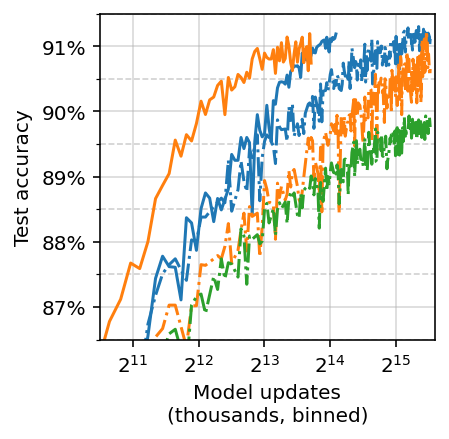

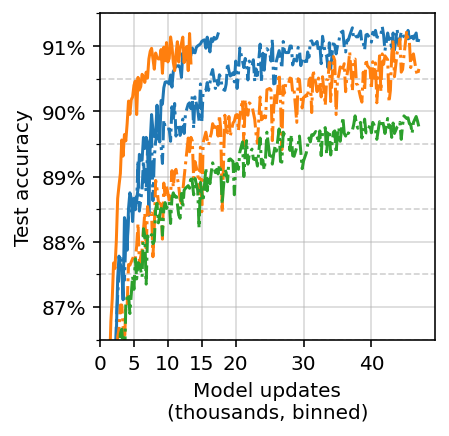

In [109]:
w = 3

N = 200
df["model_updates_binned2"] = np.round(df["model_updates"] / N) * N

print(df.model_updates_binned2.unique()[:10])

for scale in ["log", "linear"]:
    fig, ax = plt.subplots(figsize=(w, w))
    ax = lineplot(
        x="model_updates_binned2",
        y="test_accuracy",
        hue="Optimizer",
#         aggfunc="max",
#         aggfunc=lambda x: np.percentile(x, 75),
#         aggfunc="median",
        # adaptive: solid
        # passive: dashed
        style=STYLES,
        hue_order=HUE_ORDER,
        ax=ax,
        data=df,
    )
    # ax.legend(loc="best")
    ax.set_ylim(*ACC_LIM)
    ax.set_xlim(0, None)
    ax.yaxis.set_major_formatter(PERC_FORMAT)
    ax.xaxis.set_major_formatter(MU_FORMAT)
    # ax.set_xscale("log", basex=2)
    # ax.set_xlim(1000, None)
    ax.xaxis.set_major_locator(plt.FixedLocator([i * 1000 for i in [0, 5, 10, 15, 20, 30, 40]]))

    ax.grid(alpha=0.5)
    ax.set_ylabel("Test accuracy")
    ax.set_xlabel("Model updates\n(thousands, binned)")
    if scale == "log":
        ax.set_xlim(2**10.5, None)
        ax.set_xscale("log", basex=2)
        ax.xaxis.set_major_locator(plt.FixedLocator([2**i for i in range(20)]))
    ax.grid(which="minor", linestyle="--", alpha=0.6)
    ax.yaxis.set_minor_locator(plt.MultipleLocator(0.005))


#         ax.set_ylim(0.84, 0.915)
    fig.savefig(f"acc_mu_{scale}.png", dpi=300, bbox_inches="tight")

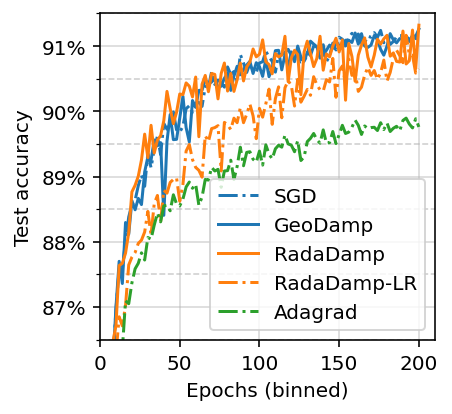

In [106]:
fig, ax = plt.subplots(figsize=(w, w))

N = 2
df["epochs_binned"] = (df.epochs / N).astype(int) * N
ax = lineplot(
    x="epochs_binned",
    y="test_accuracy",
    hue="Optimizer",
    hue_order=HUE_ORDER,
    style=STYLES,
    ax=ax,
    data=df[df.epochs_binned.isin([1 * i for i in range(1000)])],
    aggfunc="mean",
)
ax.set_ylim(*ACC_LIM)
ax.set_xlim(0, None)
ax.grid(alpha=0.5)
ax.grid(which="minor", linestyle="--", alpha=0.6)
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.005))
ax.yaxis.set_major_formatter(PERC_FORMAT)
ax.set_ylabel("Test accuracy")
ax.set_xlabel("Epochs (binned)")
ax.legend(loc="best")
fig.savefig("epochs-acc.png", dpi=300, bbox_inches="tight")

<ipython-input-107-05a0ec667bfb>:14: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_yscale("log", basey=2)


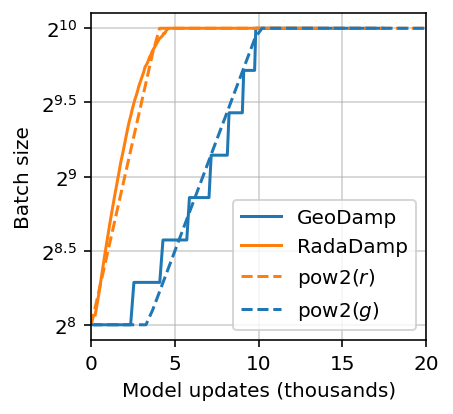

In [107]:
fig, ax = plt.subplots(figsize=(w, w))

show = df.copy()
idx = show.Optimizer == "RadaDamp"
ax = lineplot(
    x="model_updates",
    y="batch_size_",
    hue="Optimizer",
    hue_order=HUE_ORDER,
    style=STYLES,#[STYLES[1], STYLES[2]],
    ax=ax,
    data=show[show.damper.isin(["radadamp", "geodamp"])],
)
ax.set_yscale("log", basey=2)
ax.grid(alpha=0.6)
ax.set_ylabel("Batch size")
ax.set_xlabel("Model updates (thousands)")
ylocs = [2**(i/2) for i in range(8, 30)]
ax.yaxis.set_major_locator(plt.FixedLocator(ylocs))
def _log_fmt(x, _):
    pwr = np.log2(x)
    if abs(pwr % 1.0) < 0.1:
        pwr = int(pwr)
    return "$2^{" + str(pwr) + "}$"
ax.yaxis.set_major_formatter(plt.FuncFormatter(_log_fmt))
ax.xaxis.set_major_formatter(MU_FORMAT)
ax.set_xlim(0, 20e3)

x = np.linspace(0, 20e3)
r = 5e-4
y = 2**(r*x + 8)
ax.plot(x, np.clip(y, 256, 1024), "C1--", label="pow$2(r)$")

r = 3e-4
y = 2**(r*x + 7)
ax.plot(x, np.clip(y, 256, 1024), "C0--", label="pow$2(g)$")
ax.legend(loc="best")
fig.savefig("bs.png", dpi=300, bbox_inches="tight")